In [1]:
import numpy as np
import pandas as pd
import random
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import data

In [2]:
# TODO : work on companies that are new thus do not have data for the last 10 years. 
# For instance here Stellantis appears as a great diversifier in a portfolio (low correlation),
# but it is just the code that needs adjustments.

In [3]:
df, instruments, company = data.get_df("CAC40")
df = data.extended_df(traded=instruments, df=df)
df.index = pd.to_datetime(df.index)

In [4]:
df

,^FCHI open,AI.PA open,AIR.PA open,ALO.PA open,MT.AS open,CS.PA open,BNP.PA open,EN.PA open,CAP.PA open,CA.PA open,...,VIE.PA active,DG.PA % ret,DG.PA % ret vol,DG.PA active,VIV.PA % ret,VIV.PA % ret vol,VIV.PA active,WLN.PA % ret,WLN.PA % ret vol,WLN.PA active
date,,,,,,,,,,,,,,,,,,,,,
2012-06-18,3120.820068,46.660763,22.339032,19.943037,20.954047,5.269423,17.964567,11.715524,24.117636,10.910014,...,True,NaN,NaN,True,NaN,NaN,True,NaN,NaN,True
2012-06-19,3064.199951,46.470339,22.749192,19.603648,20.485456,5.089783,16.512560,11.721332,23.636469,10.363024,...,True,0.024978,NaN,True,0.026480,NaN,True,0.000000,NaN,False
2012-06-20,3126.639893,47.115626,22.711138,20.072329,21.687883,5.292853,17.032593,11.773594,24.041664,10.675590,...,True,0.007108,NaN,True,0.005374,NaN,True,0.000000,NaN,False
2012-06-21,3111.030029,46.703063,22.503943,20.237983,21.670199,5.272026,17.204965,11.843278,24.041666,10.619776,...,True,-0.001152,NaN,True,-0.004633,NaN,True,0.000000,NaN,False
2012-06-22,3090.409912,46.755964,22.546224,20.120810,21.042461,5.227767,16.772580,11.683585,23.805303,10.623494,...,True,0.006777,NaN,True,0.002864,NaN,True,0.000000,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-10,6316.410156,141.500000,104.599998,26.250000,28.400000,23.275000,50.709999,31.459999,176.000000,18.625000,...,True,-0.028855,0.014000,True,-0.005435,0.009913,True,-0.053915,0.025070,True
2022-06-13,6088.049805,137.800003,100.099998,25.309999,26.850000,22.320000,47.485001,31.010000,168.199997,18.334999,...,True,-0.024722,0.014649,True,-0.009107,0.009976,True,-0.047490,0.025045,True
2022-06-14,6063.799805,138.759995,98.610001,25.420000,26.375000,22.280001,47.500000,30.690001,171.050003,18.520000,...,True,-0.026860,0.015496,True,0.002757,0.009987,True,-0.072934,0.028908,True


In [5]:
df_ret = pd.DataFrame(index=df.index)
for instr in instruments:
    df_ret[instr] = df["{} % ret".format(instr)]

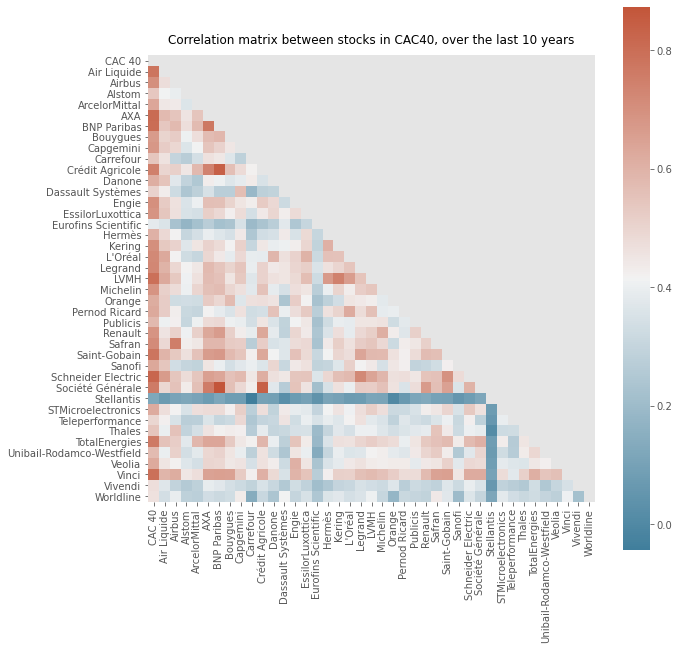

In [6]:
# Vizualisation of the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
corr = df_ret.corr()
labels = ['CAC 40']+company
mask = np.triu(np.ones_like(corr, dtype=bool))
corr_viz = sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(230, 20, as_cmap=True),
            square=True, xticklabels=labels, yticklabels=labels)
corr_viz.set_title('Correlation matrix between stocks in CAC40, over the last 10 years', fontdict={'fontsize':12}, pad=12);

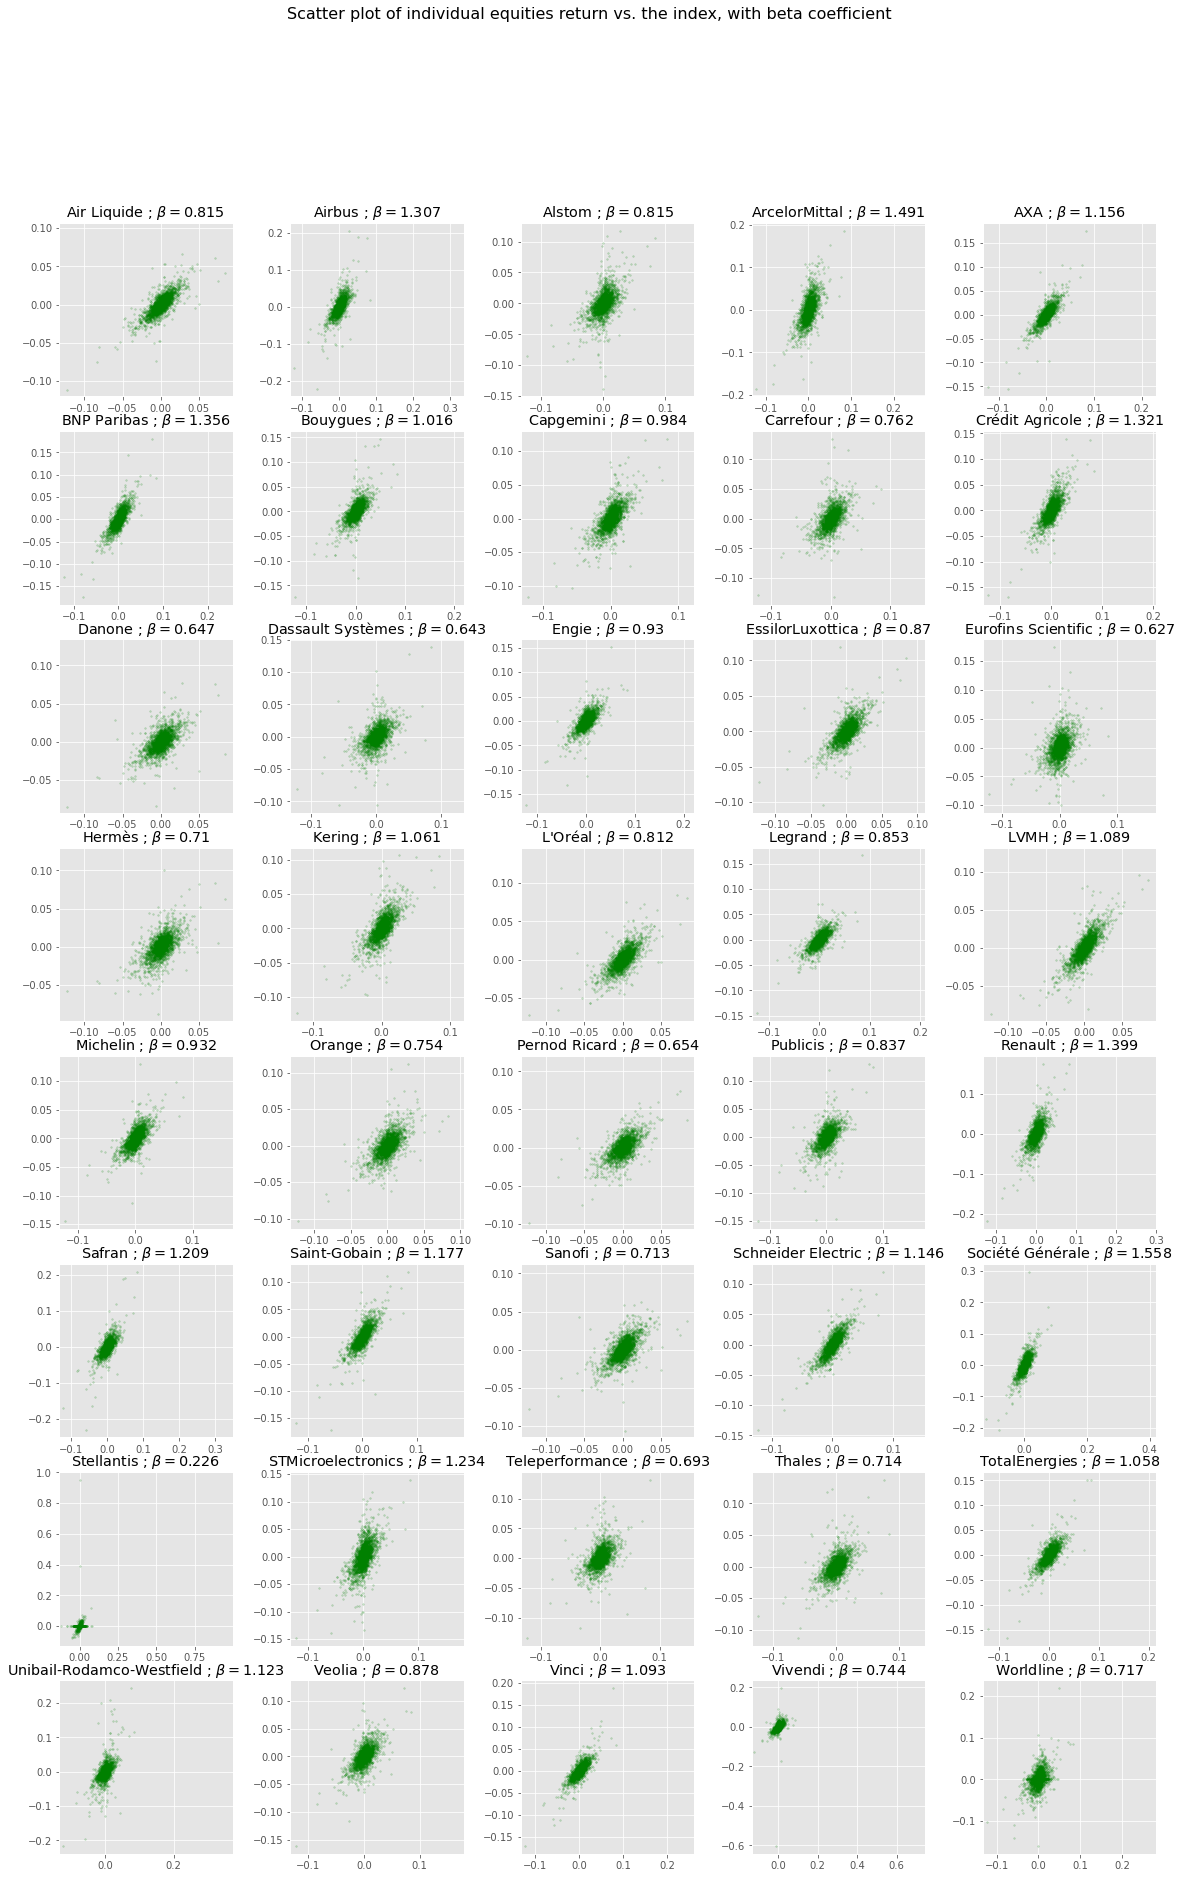

In [7]:
import math
i,j=0,0
PLOTS_PER_ROW = 5
fig, axs = plt.subplots(math.ceil(len(instruments[1:])/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 30))
fig.suptitle('Scatter plot of individual equities return vs. the index, with beta coefficient', fontsize=16)
for instr in instruments[1:]:
    axs[i][j].scatter(df["^FCHI % ret"], df["{} % ret".format(instr)], s=3, alpha = 0.2, c="green")
    axs[i][j].axis('square')

    #axs[i][j].plot(df["{} % ret vol".format(instr)].index, df["{} % ret vol".format(instr)], alpha=0.8, c="r")

    # To get coeffs for linear regression against the index. 
    # We could also use the empirical cov divided by empirical var of the individual stock.
    x=np.array(df["^FCHI % ret"].dropna().values.tolist()).reshape((-1, 1))
    y=np.array(df["{} % ret".format(instr)].dropna().values.tolist()).reshape((-1, 1))
    model = LinearRegression()
    model.fit(x, y)

    axs[i][j].set_title(company[i*PLOTS_PER_ROW+j]+r" ; $\beta = $"+str(round(model.coef_[0][0], 3)))
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()

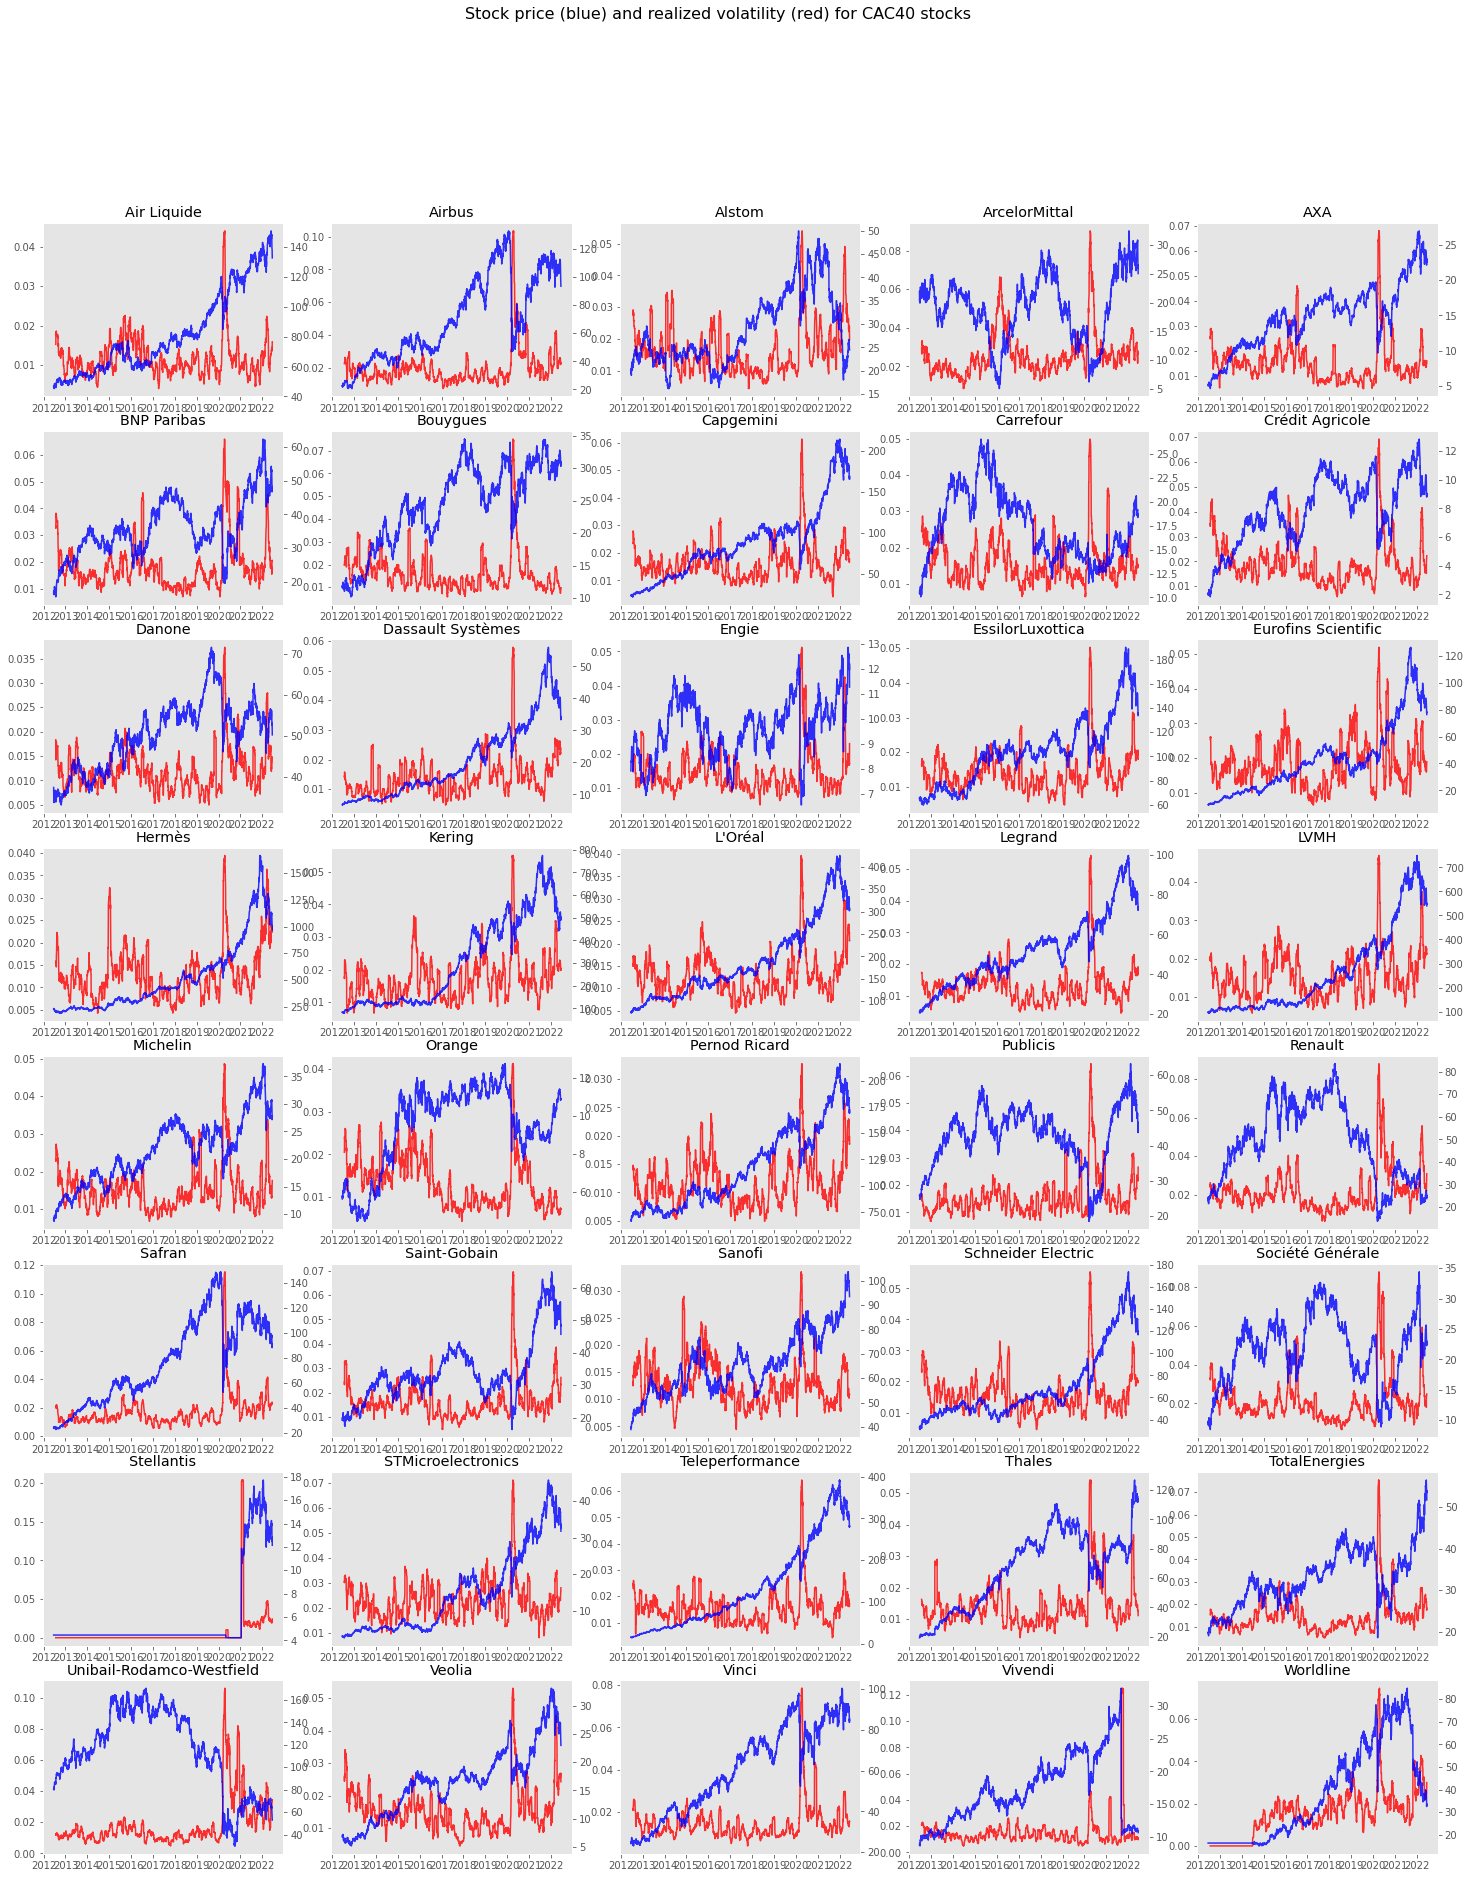

In [8]:
i,j=0,0
fig, axs = plt.subplots(math.ceil(len(instruments[1:])/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(25, 30))
fig.suptitle('Stock price (blue) and realized volatility (red) for CAC40 stocks', fontsize=16)
for instr in instruments[1:]:
    axs[i][j].grid(False)
    axs[i][j].plot(df["{} % ret vol".format(instr)].index, df["{} % ret vol".format(instr)], alpha=0.8, c="r")

    axs2 = axs[i][j].twinx()
    axs2.grid(False)
    axs2.plot(df["{} close".format(instr)].index, df["{} close".format(instr)], alpha=0.8, c="b")

    axs[i][j].set_title(company[i*PLOTS_PER_ROW+j])
    #axs[i][j].set_xticklabels(axs[i][j].xaxis.get_majorticklabels(), rotation=45)

    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
plt.show()    